## 1. 连接，以及用1*1的卷积

### 数据块的连接,等会就是用这个 作神经网络连接

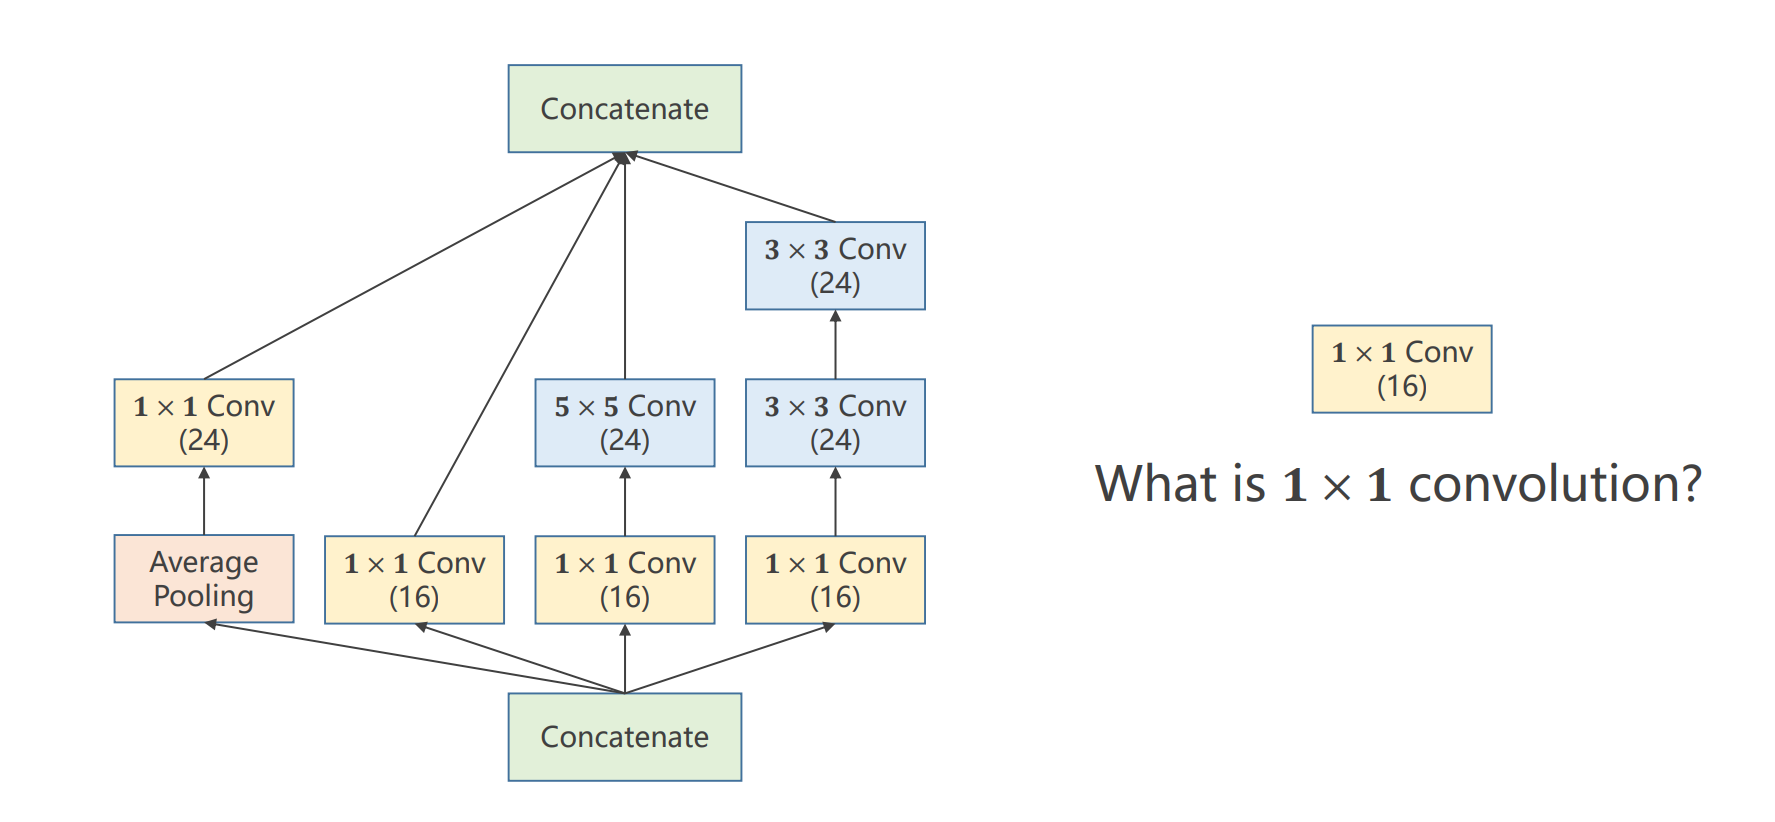

## 例如：

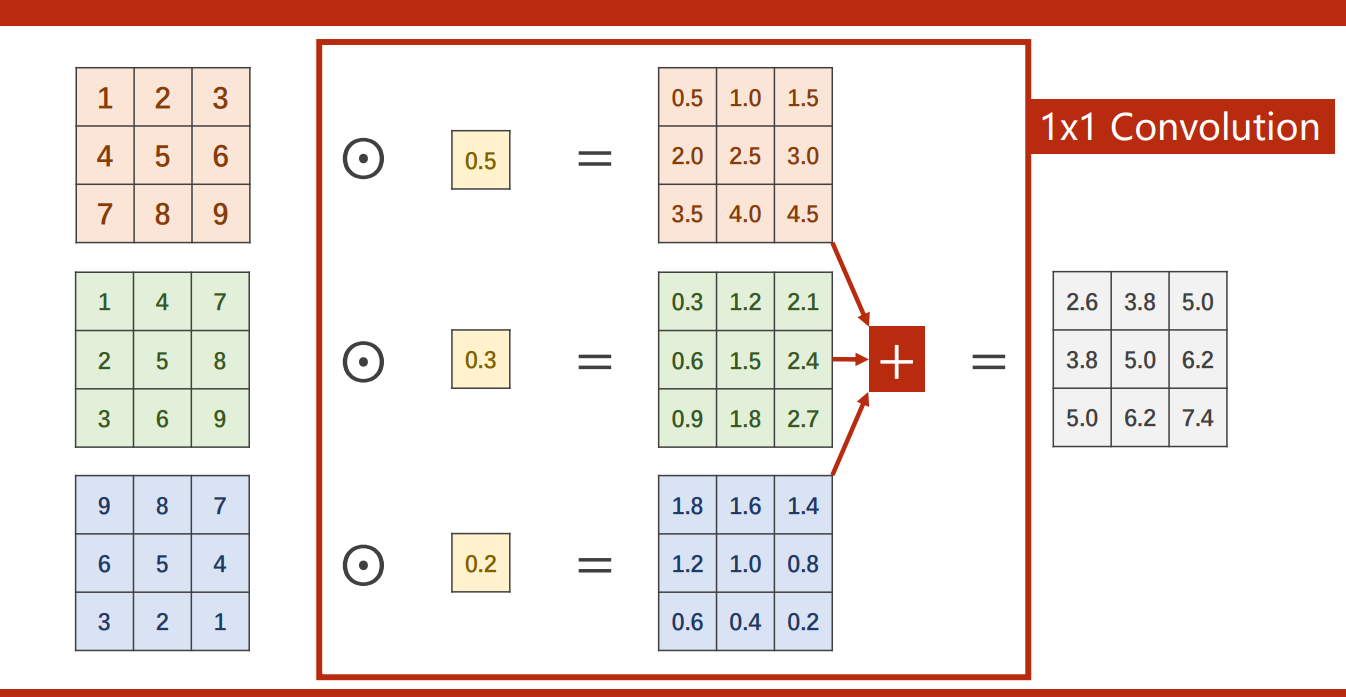

## 作1*1的卷积，可以减少工作量，如：

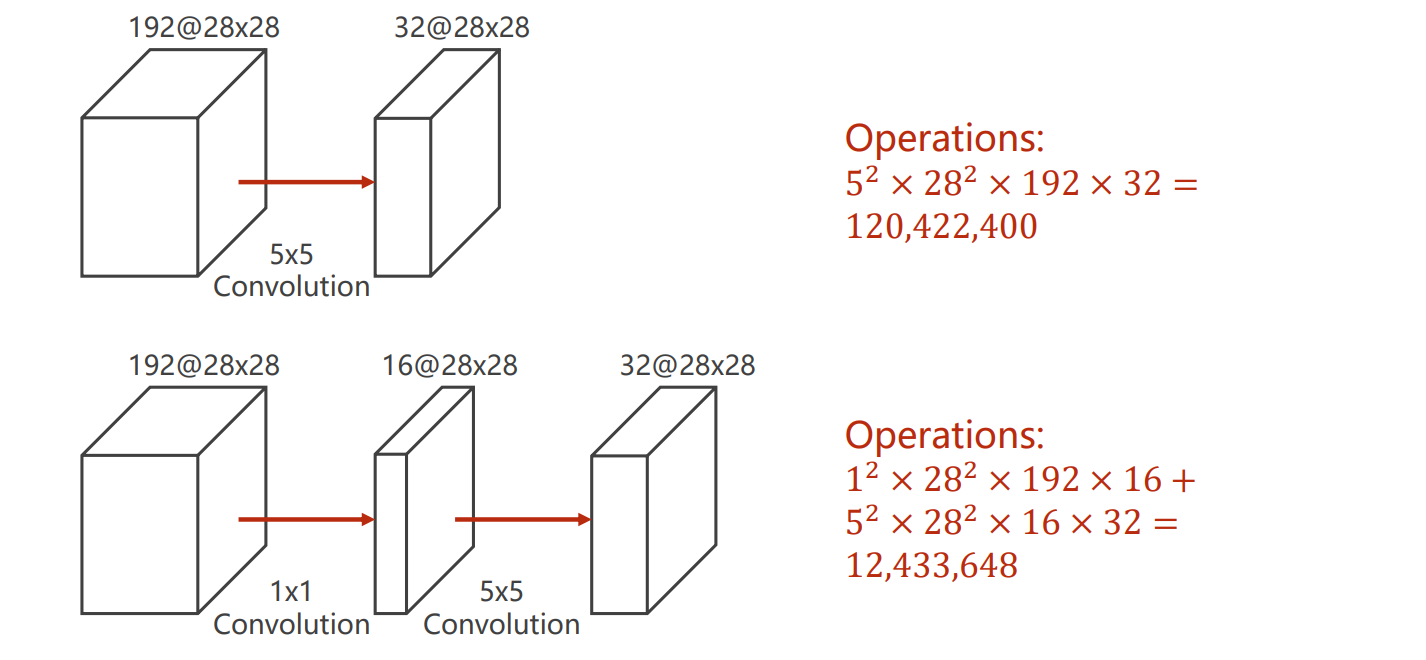

### 以下面的为例，作神经网络

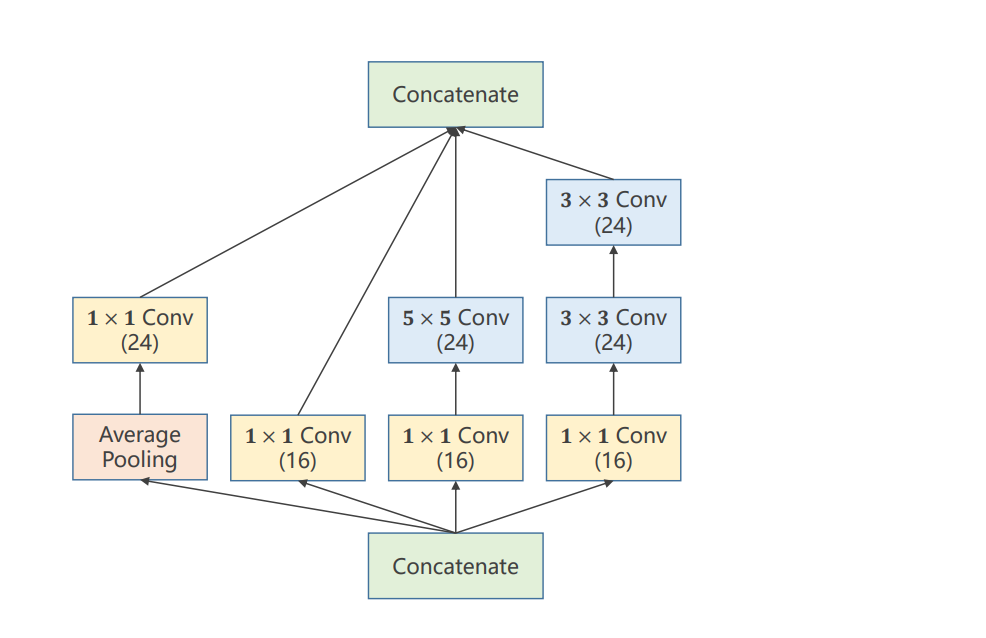

In [9]:
import torch
import torch.nn.functional as F
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [10]:
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ),(0.3081, ))
])

In [11]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)

In [12]:
train_dataset = datasets.MNIST(root='../dataset/mnist/', train = True, download = True, transform = transform)
train_loader = DataLoader(train_dataset, shuffle = True, batch_size = batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train = False, download = True, transform = transform)
test_loader = DataLoader(test_dataset, shuffle = False, batch_size = batch_size)

In [13]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [14]:
for f, l in enumerate(train_loader):
    print(l)
    break

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.42

In [15]:
class InceptionA(nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size = 1)
        
        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size = 1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size = 5, padding = 2)
        
        self.branch3x3_1 = nn.Conv2d(in_channels, 16, kernel_size = 1)
        self.branch3x3_2 = nn.Conv2d(16, 24, kernel_size = 3, padding = 1)
        self.branch3x3_3 = nn.Conv2d(24, 24, kernel_size = 3, padding = 1)
        
        self.brach_pool = nn.Conv2d(in_channels, 24, kernel_size = 1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)
        
        brach_pool = F.avg_pool2d(x, kernel_size = 3, stride = 1,padding = 1)
        brach_pool = self.brach_pool(brach_pool)
        
        outputs = [branch1x1, branch5x5, branch3x3, brach_pool] # 连接起来
        return torch.cat(outputs, dim = 1)

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 88, out_channels = 20, kernel_size = 5)
        
        self.incep1 = InceptionA(in_channels = 10)
        self.incep2 = InceptionA(in_channels = 20)
        
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)
    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incep1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incep2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x

In [27]:
model = Net()
model

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(88, 20, kernel_size=(5, 5), stride=(1, 1))
  (incep1): InceptionA(
    (branch1x1): Conv2d(10, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch5x5_1): Conv2d(10, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch5x5_2): Conv2d(16, 24, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (branch3x3_1): Conv2d(10, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch3x3_2): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (branch3x3_3): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (brach_pool): Conv2d(10, 24, kernel_size=(1, 1), stride=(1, 1))
  )
  (incep2): InceptionA(
    (branch1x1): Conv2d(20, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch5x5_1): Conv2d(20, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch5x5_2): Conv2d(16, 24, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (branch3x3_1): Conv2d(20, 16, kernel_size=(1, 1), stride=(1, 1))
    

In [28]:
loss_value = nn.CrossEntropyLoss()
loss_value

CrossEntropyLoss()

In [29]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01 ,momentum = 0.5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

In [30]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        features, labels = data
        optimizer.zero_grad()
        output = model(features)
        loss = loss_value(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0

In [31]:
acc_list = []
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim = 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_list.append(correct/total)
    print('accuracy on test set: %d %% ' % (100*correct/total))

In [32]:
if __name__ == '__main__':
    epoch_list = []
    for epoch in range(10):
        epoch_list.append(epoch)
        train(epoch)
        test()

[1,   300] loss: 0.880
[1,   600] loss: 0.215
[1,   900] loss: 0.154
accuracy on test set: 96 % 
[2,   300] loss: 0.126
[2,   600] loss: 0.104
[2,   900] loss: 0.095
accuracy on test set: 97 % 
[3,   300] loss: 0.092
[3,   600] loss: 0.078
[3,   900] loss: 0.072
accuracy on test set: 98 % 
[4,   300] loss: 0.068
[4,   600] loss: 0.065
[4,   900] loss: 0.066
accuracy on test set: 98 % 
[5,   300] loss: 0.056
[5,   600] loss: 0.057
[5,   900] loss: 0.058
accuracy on test set: 98 % 
[6,   300] loss: 0.053
[6,   600] loss: 0.052
[6,   900] loss: 0.049
accuracy on test set: 98 % 
[7,   300] loss: 0.047
[7,   600] loss: 0.048
[7,   900] loss: 0.046
accuracy on test set: 98 % 
[8,   300] loss: 0.043
[8,   600] loss: 0.043
[8,   900] loss: 0.041
accuracy on test set: 98 % 
[9,   300] loss: 0.042
[9,   600] loss: 0.038
[9,   900] loss: 0.038
accuracy on test set: 98 % 
[10,   300] loss: 0.033
[10,   600] loss: 0.038
[10,   900] loss: 0.041
accuracy on test set: 98 % 


In [33]:
import matplotlib.pyplot as plt

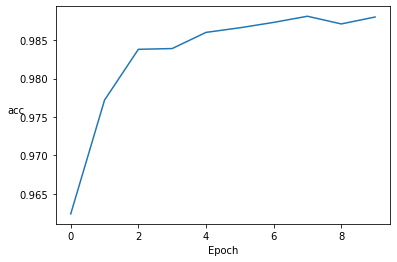

In [34]:
plt.plot(epoch_list, acc_list)
plt.xlabel('Epoch')
plt.ylabel('acc', rotation = 0)
plt.show()

### 1.2 另一种连接方式

### 可以解决梯度消失的问题
### H(x) = F(x) + x 求导数的话,最后一位是1，就可以防止梯度消失的问题

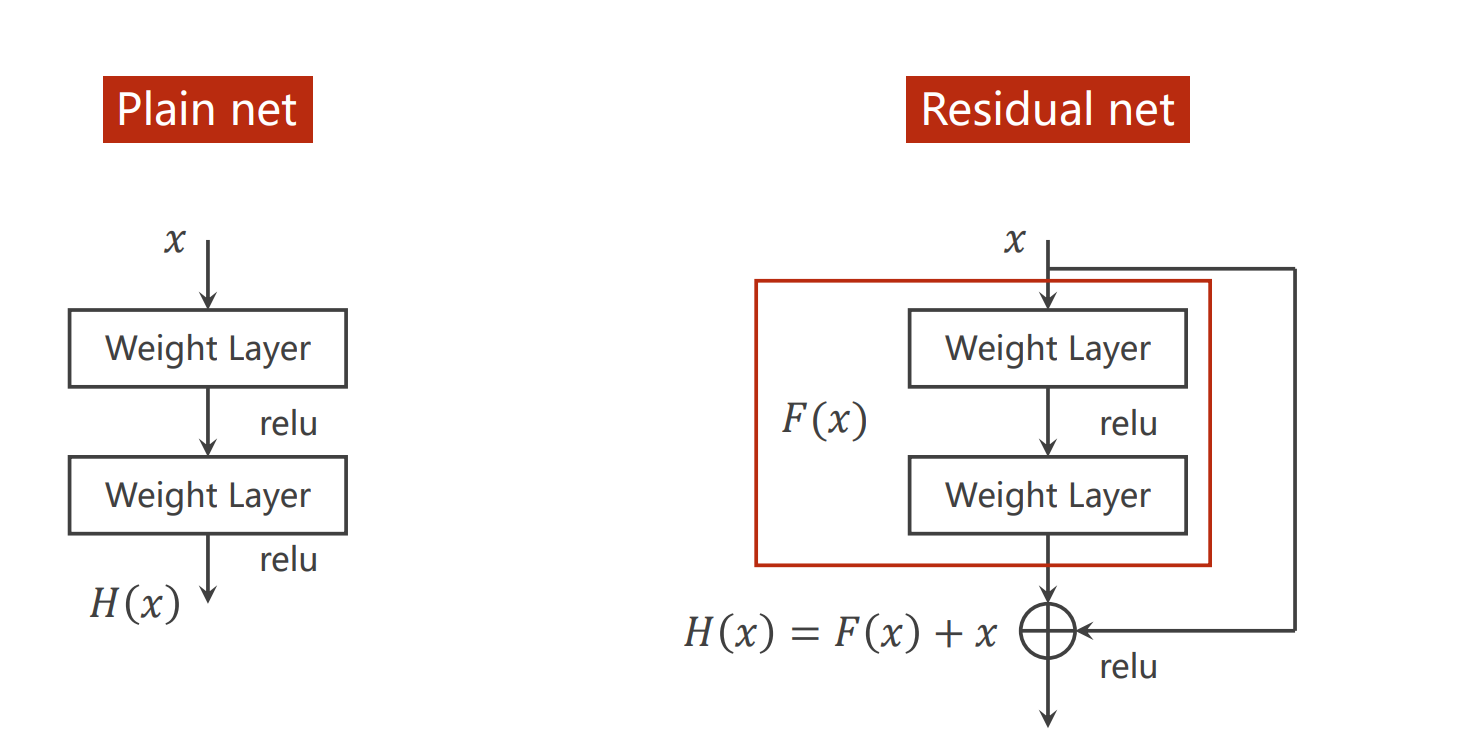

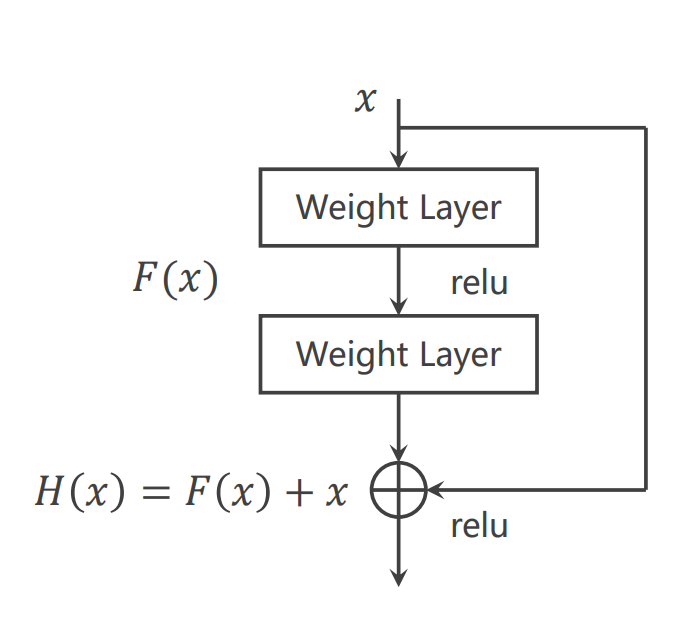

In [49]:
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.channels = channels
        self.conv1 = nn.Conv2d(channels, channels, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size = 3, padding = 1)
        
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(x + y)

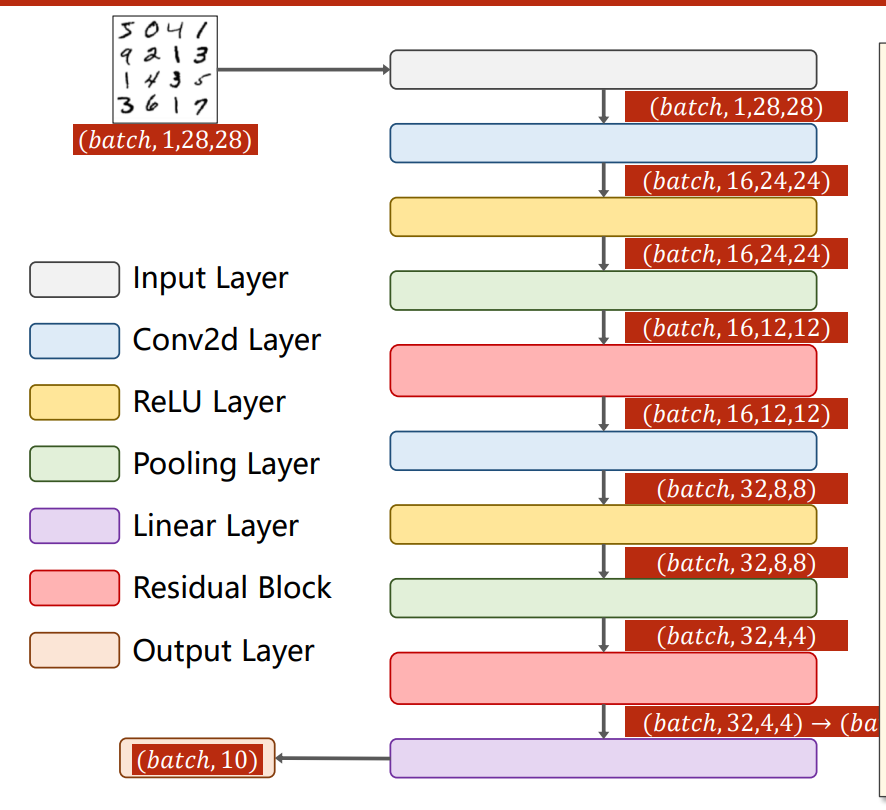

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.rblock1 = ResidualBlock(16)
        self.rblock2 = ResidualBlock(32)
        self.fc = nn.Linear(512, 10)
    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(F.relu(self.conv1(x)))
        x = self.rblock1(x)
        x = self.mp(F.relu(self.conv2(x)))
        x = self.rblock2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x
model = Net()

In [51]:
model

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (rblock1): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (rblock2): ResidualBlock(
    (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [52]:
loss_value = nn.CrossEntropyLoss()
loss_value

CrossEntropyLoss()

In [53]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01 ,momentum = 0.5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

In [54]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        features, labels = data
        optimizer.zero_grad()
        output = model(features)
        loss = loss_value(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0

In [55]:
acc_list = []
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim = 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_list.append(correct/total)
    print('accuracy on test set: %d %% ' % (100*correct/total))

In [56]:
if __name__ == '__main__':
    epoch_list = []
    for epoch in range(10):
        epoch_list.append(epoch)
        train(epoch)
        test()

[1,   300] loss: 0.532
[1,   600] loss: 0.165
[1,   900] loss: 0.119
accuracy on test set: 97 % 
[2,   300] loss: 0.091
[2,   600] loss: 0.078
[2,   900] loss: 0.070
accuracy on test set: 98 % 
[3,   300] loss: 0.059
[3,   600] loss: 0.056
[3,   900] loss: 0.053
accuracy on test set: 98 % 
[4,   300] loss: 0.047
[4,   600] loss: 0.045
[4,   900] loss: 0.044
accuracy on test set: 98 % 
[5,   300] loss: 0.038
[5,   600] loss: 0.038
[5,   900] loss: 0.041
accuracy on test set: 98 % 
[6,   300] loss: 0.037
[6,   600] loss: 0.029
[6,   900] loss: 0.034
accuracy on test set: 98 % 
[7,   300] loss: 0.029
[7,   600] loss: 0.032
[7,   900] loss: 0.028
accuracy on test set: 98 % 
[8,   300] loss: 0.027
[8,   600] loss: 0.025
[8,   900] loss: 0.031
accuracy on test set: 98 % 
[9,   300] loss: 0.023
[9,   600] loss: 0.022
[9,   900] loss: 0.028
accuracy on test set: 99 % 
[10,   300] loss: 0.024
[10,   600] loss: 0.020
[10,   900] loss: 0.019
accuracy on test set: 99 % 


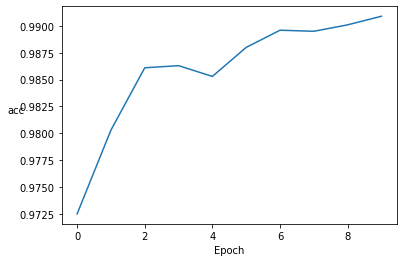

In [57]:
import matplotlib.pyplot as plt
plt.plot(epoch_list, acc_list)
plt.xlabel('Epoch')
plt.ylabel('acc', rotation = 0)
plt.show()

### 把连接改一下，变成0.5

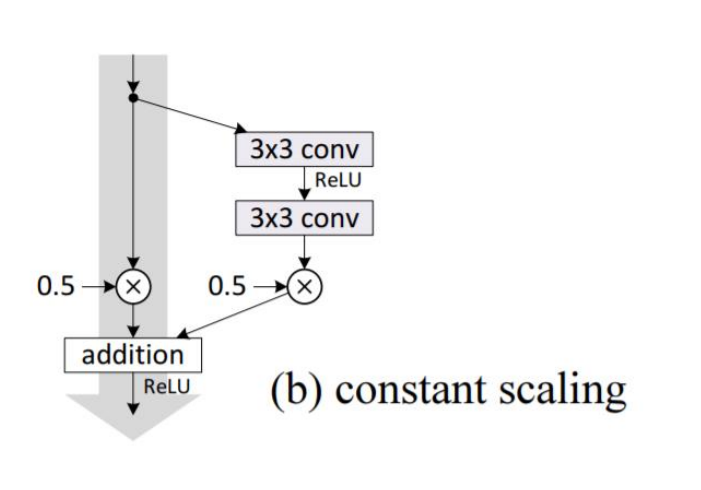

In [58]:
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.channels = channels
        self.conv1 = nn.Conv2d(channels, channels, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size = 3, padding = 1)
        
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(0.5*(x + y))

In [59]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.rblock1 = ResidualBlock(16)
        self.rblock2 = ResidualBlock(32)
        self.fc = nn.Linear(512, 10)
    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(F.relu(self.conv1(x)))
        x = self.rblock1(x)
        x = self.mp(F.relu(self.conv2(x)))
        x = self.rblock2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x
model = Net()
model

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (rblock1): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (rblock2): ResidualBlock(
    (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [60]:
loss_value = nn.CrossEntropyLoss()
loss_value

CrossEntropyLoss()

In [61]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01 ,momentum = 0.5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

In [62]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        features, labels = data
        optimizer.zero_grad()
        output = model(features)
        loss = loss_value(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0

In [63]:
acc_list = []
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim = 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_list.append(correct/total)
    print('accuracy on test set: %d %% ' % (100*correct/total))

In [64]:
if __name__ == '__main__':
    epoch_list = []
    for epoch in range(15):
        epoch_list.append(epoch)
        train(epoch)
        test()

[1,   300] loss: 1.136
[1,   600] loss: 0.250
[1,   900] loss: 0.162
accuracy on test set: 95 % 
[2,   300] loss: 0.129
[2,   600] loss: 0.109
[2,   900] loss: 0.096
accuracy on test set: 97 % 
[3,   300] loss: 0.085
[3,   600] loss: 0.077
[3,   900] loss: 0.072
accuracy on test set: 98 % 
[4,   300] loss: 0.066
[4,   600] loss: 0.060
[4,   900] loss: 0.059
accuracy on test set: 98 % 
[5,   300] loss: 0.057
[5,   600] loss: 0.049
[5,   900] loss: 0.051
accuracy on test set: 98 % 
[6,   300] loss: 0.046
[6,   600] loss: 0.045
[6,   900] loss: 0.048
accuracy on test set: 98 % 
[7,   300] loss: 0.039
[7,   600] loss: 0.044
[7,   900] loss: 0.042
accuracy on test set: 98 % 
[8,   300] loss: 0.033
[8,   600] loss: 0.039
[8,   900] loss: 0.039
accuracy on test set: 98 % 
[9,   300] loss: 0.030
[9,   600] loss: 0.035
[9,   900] loss: 0.034
accuracy on test set: 98 % 
[10,   300] loss: 0.028
[10,   600] loss: 0.030
[10,   900] loss: 0.032
accuracy on test set: 98 % 
[11,   300] loss: 0.027
[11

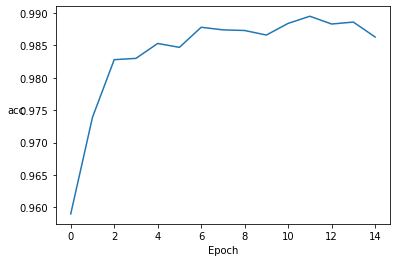

In [65]:
import matplotlib.pyplot as plt
plt.plot(epoch_list, acc_list)
plt.xlabel('Epoch')
plt.ylabel('acc', rotation = 0)
plt.show()